In [1]:
import numpy as np
import mlgrad.func as func
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.gd as gd

import matplotlib.pyplot as plt

In [2]:
lm_orig = model.LinearModel([2.,3.])
lm_orig

In [3]:
N = 100
X = np.random.random((N,1))
Y = lm_orig.evaluate_all(X)
dY = 2.0*np.random.random((N,))-1
Y1 = Y + 0.5*dY

In [4]:
loss_func = loss.Loss(func.Square())
loss_func

In [5]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)

alg = gd.FG(lm_learn, loss_func, h=1.0)
#alg.use_gradient_transformer(gd.AdaM1())
alg.fit(X, Y1)
print("K:", alg.K, lm_learn.param.base)

K: 56 [ 2.01986963  2.8981283 ]


In [6]:
lm_learn

In [7]:
Y_p = lm_learn.evaluate_all(X)
Z = np.abs(Y1-Y_p)
Z.sort()
plt.hist(Z)

(array([ 15.,   9.,  13.,  10.,   8.,  10.,  17.,  11.,   4.,   3.]),
 array([ 0.00258414,  0.05895945,  0.11533476,  0.17171007,  0.22808538,
         0.28446069,  0.340836  ,  0.39721131,  0.45358662,  0.50996193,
         0.56633724]),
 <a list of 10 Patch objects>)

In [8]:
import sklearn.metrics as metrics
metrics.r2_score(Y1, Y_p)

0.89631032645939279

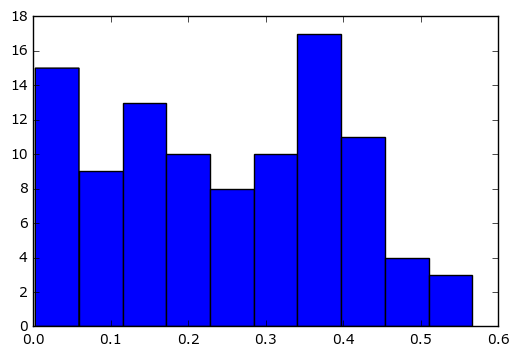

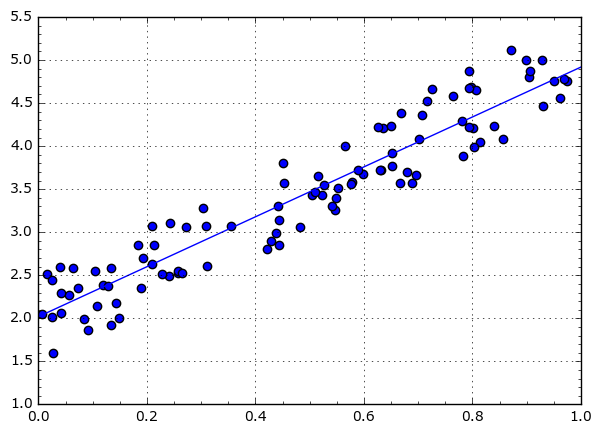

In [9]:
plt.figure(figsize=(7,5))
xs = np.linspace(0., 1., 100)
xs = xs.reshape((-1,1))
ys = lm_learn.evaluate_all(xs)
plt.scatter(X[:,0], Y1, s=36)
plt.plot(xs, ys)
plt.grid(1)
plt.minorticks_on()
plt.xlim(0,1)
plt.show()